In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt 
from sklearn.metrics import *
import datetime
from weather_perceptron import Perceptron

In [2]:
df = pd.read_csv("weatherHistory.csv")

In [3]:
df["date"] = np.zeros(len(df))
for i in tqdm(range(len(df))):
    df["date"][i] = df["Formatted Date"][i][0:10]

df["time"] = np.zeros(len(df))
for i in tqdm(range(len(df))):
    df["time"][i] = df["Formatted Date"][i][11:13]

  0%|          | 0/96453 [00:00<?, ?it/s]c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
  0%|          | 0/96453 [00:00<?, ?it/s]c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A val

In [4]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,date,time
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01,0.0
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01,1.0
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01,2.0
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01,3.0
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,2016-09-09,19.0
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,2016-09-09,20.0
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,2016-09-09,21.0
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,2016-09-09,22.0


In [5]:
df["day"] = np.zeros(len(df))
for i in tqdm(range(len(df))):
    datetime.datetime.strptime(df["date"][i] ,"%Y-%m-%d")
    df["day"][i] = datetime.datetime.strptime(df["date"][i],'%Y-%m-%d').timetuple().tm_yday
    df["day"] = df["day"].to_numpy(int)

  0%|          | 0/96453 [00:00<?, ?it/s]c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
100%|██████████| 96453/96453 [02:17<00:00, 703.47it/s]


In [6]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,date,time,day
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01,0.0,91
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01,1.0,91
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01,2.0,91
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01,3.0,91
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01,4.0,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,2016-09-09,19.0,253
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,2016-09-09,20.0,253
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,2016-09-09,21.0,253
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,2016-09-09,22.0,253


In [7]:
df["date"] = pd.to_datetime(df["date"])
df["date"]

0       2006-04-01
1       2006-04-01
2       2006-04-01
3       2006-04-01
4       2006-04-01
           ...    
96448   2016-09-09
96449   2016-09-09
96450   2016-09-09
96451   2016-09-09
96452   2016-09-09
Name: date, Length: 96453, dtype: datetime64[ns]

In [8]:
df = df.sort_values(by=["date"], ascending=True).reset_index()
df

,index,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,date,time,day
0,2902,2006-01-01 22:00:00.000 +0100,Overcast,rain,5.472222,1.377778,0.87,22.7171,149.0,14.7959,0.0,1009.51,Mostly cloudy throughout the day.,2006-01-01,22.0,1
1,2903,2006-01-01 23:00:00.000 +0100,Overcast,rain,5.422222,1.666667,0.86,19.5615,148.0,15.6492,0.0,1009.64,Mostly cloudy throughout the day.,2006-01-01,23.0,1
2,2901,2006-01-01 21:00:00.000 +0100,Overcast,rain,4.933333,0.555556,0.86,23.9407,139.0,15.7297,0.0,1009.43,Mostly cloudy throughout the day.,2006-01-01,21.0,1
3,2900,2006-01-01 20:00:00.000 +0100,Overcast,rain,5.972222,1.861111,0.80,24.2305,140.0,11.2700,0.0,1009.39,Mostly cloudy throughout the day.,2006-01-01,20.0,1
4,2899,2006-01-01 19:00:00.000 +0100,Overcast,rain,5.472222,1.100000,0.83,25.4058,145.0,10.9158,0.0,1009.55,Mostly cloudy throughout the day.,2006-01-01,19.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,89711,2016-12-31 02:00:00.000 +0100,Mostly Cloudy,snow,-1.488889,-4.750000,0.95,8.8711,207.0,7.9856,0.0,1020.48,Mostly cloudy throughout the day.,2016-12-31,2.0,366
96449,89710,2016-12-31 01:00:00.000 +0100,Mostly Cloudy,snow,-1.161111,-4.394444,0.95,8.9999,203.0,7.3255,0.0,1020.59,Mostly cloudy throughout the day.,2016-12-31,1.0,366
96450,89709,2016-12-31 00:00:00.000 +0100,Mostly Cloudy,snow,-0.872222,-4.083333,0.94,9.1126,197.0,9.7888,0.0,1020.67,Mostly cloudy throughout the day.,2016-12-31,0.0,366
96451,89722,2016-12-31 13:00:00.000 +0100,Mostly Cloudy,rain,2.622222,-0.983333,0.83,13.9909,205.0,9.8210,0.0,1020.32,Mostly cloudy throughout the day.,2016-12-31,13.0,366


In [9]:
new_df = df.copy()
new_df["mean of temperature"] = new_df["Temperature (C)"]

In [10]:
new_df

,index,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,date,time,day,mean of temperature
0,2902,2006-01-01 22:00:00.000 +0100,Overcast,rain,5.472222,1.377778,0.87,22.7171,149.0,14.7959,0.0,1009.51,Mostly cloudy throughout the day.,2006-01-01,22.0,1,5.472222
1,2903,2006-01-01 23:00:00.000 +0100,Overcast,rain,5.422222,1.666667,0.86,19.5615,148.0,15.6492,0.0,1009.64,Mostly cloudy throughout the day.,2006-01-01,23.0,1,5.422222
2,2901,2006-01-01 21:00:00.000 +0100,Overcast,rain,4.933333,0.555556,0.86,23.9407,139.0,15.7297,0.0,1009.43,Mostly cloudy throughout the day.,2006-01-01,21.0,1,4.933333
3,2900,2006-01-01 20:00:00.000 +0100,Overcast,rain,5.972222,1.861111,0.80,24.2305,140.0,11.2700,0.0,1009.39,Mostly cloudy throughout the day.,2006-01-01,20.0,1,5.972222
4,2899,2006-01-01 19:00:00.000 +0100,Overcast,rain,5.472222,1.100000,0.83,25.4058,145.0,10.9158,0.0,1009.55,Mostly cloudy throughout the day.,2006-01-01,19.0,1,5.472222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,89711,2016-12-31 02:00:00.000 +0100,Mostly Cloudy,snow,-1.488889,-4.750000,0.95,8.8711,207.0,7.9856,0.0,1020.48,Mostly cloudy throughout the day.,2016-12-31,2.0,366,-1.488889
96449,89710,2016-12-31 01:00:00.000 +0100,Mostly Cloudy,snow,-1.161111,-4.394444,0.95,8.9999,203.0,7.3255,0.0,1020.59,Mostly cloudy throughout the day.,2016-12-31,1.0,366,-1.161111
96450,89709,2016-12-31 00:00:00.000 +0100,Mostly Cloudy,snow,-0.872222,-4.083333,0.94,9.1126,197.0,9.7888,0.0,1020.67,Mostly cloudy throughout the day.,2016-12-31,0.0,366,-0.872222
96451,89722,2016-12-31 13:00:00.000 +0100,Mostly Cloudy,rain,2.622222,-0.983333,0.83,13.9909,205.0,9.8210,0.0,1020.32,Mostly cloudy throughout the day.,2016-12-31,13.0,366,2.622222


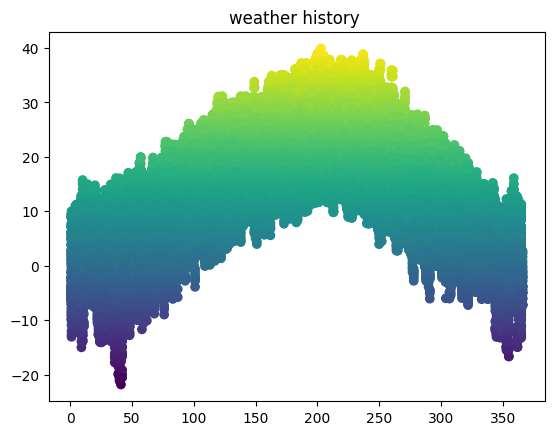

In [11]:
plt.scatter(df["day"].to_numpy(), df["Temperature (C)"].to_numpy(), c=df["Temperature (C)"])
plt.title("weather history ")
plt.show()

In [12]:
X = df["day"].copy().to_numpy()
Y = df["Temperature (C)"].copy().values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((77162,), (19291,), (77162,), (19291,))

In [13]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1) 
Y_train = Y_train.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((77162, 1), (19291, 1), (77162, 1), (19291, 1))

In [14]:
model = Perceptron(0.00001, 1,"relu")
L_train, A_train, L_test, A_test = model.fit(X_train, Y_train, X_test, Y_test, epochs=30)

  3%|▎         | 1/30 [08:03<3:53:45, 483.63s/it]

In [ ]:
model.evaluate(X_test,Y_test)

In [ ]:
fig , (ax1 , ax2) = plt.subplots(1,2 , figsize=(12,5))


ax1.plot(L_train)
ax1.plot(L_test)
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss")
ax1.title.set_text('LOSS')

ax2.plot(A_train)
ax2.plot(A_test)
ax2.set_xlabel("epoch")
ax2.set_ylabel("Accuracy")
ax2.title.set_text('Accuracy')